In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import statsmodels.api as smd
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab

In [7]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [8]:
data=pd.read_csv("breast-cancer-wisconsin.data")
data.head(100)

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [9]:
data.columns

Index(['id number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [10]:
data.shape

(699, 11)

In [11]:
data.describe()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id number                    699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [13]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [14]:
data['Clump Thickness'].value_counts()

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64

In [15]:
data['Uniformity of Cell Size'].value_counts()

1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity of Cell Size, dtype: int64

In [16]:
data['Uniformity of Cell Shape'].value_counts()

1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity of Cell Shape, dtype: int64

In [17]:
data['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [18]:
data.describe()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [19]:
data['Bare Nuclei']=data['Bare Nuclei'].replace('?',np.nan)
data=data.ffill(axis=0)

In [20]:
data.shape

(699, 11)

In [21]:
data['Bare Nuclei'].value_counts()

1     413
10    134
5      31
2      30
3      29
8      21
4      19
9       9
7       9
6       4
Name: Bare Nuclei, dtype: int64

In [22]:
data.loc[data['Bare Nuclei'] == '?'].sum()

id number                      0.0
Clump Thickness                0.0
Uniformity of Cell Size        0.0
Uniformity of Cell Shape       0.0
Marginal Adhesion              0.0
Single Epithelial Cell Size    0.0
Bare Nuclei                    0.0
Bland Chromatin                0.0
Normal Nucleoli                0.0
Mitoses                        0.0
Class                          0.0
dtype: float64

In [23]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [24]:
data.isnull().sum()

id number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id number                    699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [26]:
data['Bare Nuclei']=data['Bare Nuclei'].astype('int64')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id number                    699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


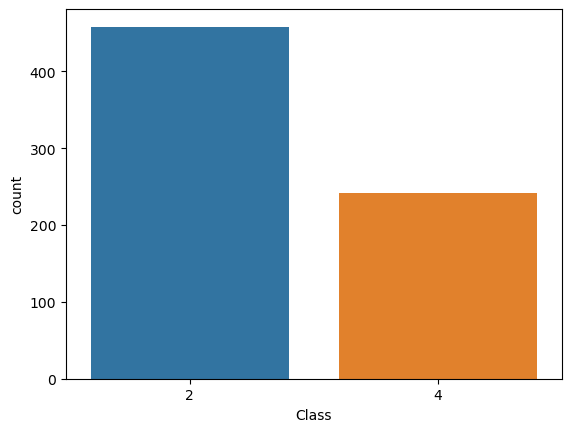

In [28]:
plt1=sns.countplot(data['Class'])

In [29]:
data.head(20)

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


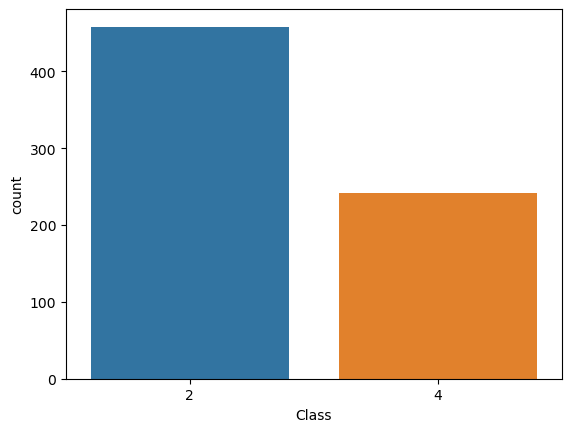

In [30]:
plt1=sns.countplot(data['Class'])

In [31]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int')

In [32]:
data['Bare Nuclei'].dtype

dtype('int32')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id number                    699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int32
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 57.5 KB


In [34]:
data['Class'] = data['Class'].map({4:1 , 2: 0})

In [35]:
data

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


# Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
num_vars = ['id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
           'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']
data[num_vars] = scaler.fit_transform(data[num_vars])

In [38]:
data.head(80)

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.696275,-0.179662,-0.611825,-0.343912,0
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.781250,-0.179662,-0.284112,-0.343912,0
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.420994,-0.179662,-0.611825,-0.343912,0
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.129567,-0.179662,1.354454,-0.343912,0
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.696275,-0.179662,-0.611825,-0.343912,0
5,-0.088513,1.273138,2.251526,2.287222,1.820022,1.710106,1.781250,2.282766,1.354454,-0.343912,1
6,-0.086929,-1.214667,-0.699995,-0.743299,-0.633247,-0.549561,1.781250,-0.179662,-0.611825,-0.343912,0
7,-0.086180,-0.859266,-0.699995,-0.406574,-0.633247,-0.549561,-0.696275,-0.179662,-0.611825,-0.343912,0
8,-0.062638,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.696275,-1.000471,-0.611825,1.990014,0
9,-0.062638,-0.148465,-0.372048,-0.743299,-0.633247,-0.549561,-0.696275,-0.590067,-0.611825,-0.343912,0


##Test-Train Split of Input Dataset##

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = data.drop(['Class'], axis=1)
y = data.pop('Class')

In [41]:
X.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.696275,-0.179662,-0.611825,-0.343912
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.781250,-0.179662,-0.284112,-0.343912
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.420994,-0.179662,-0.611825,-0.343912
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.129567,-0.179662,1.354454,-0.343912
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.696275,-0.179662,-0.611825,-0.343912


In [42]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [44]:
y_train.shape

(489,)

In [45]:
y_train.unique()

array([0, 1], dtype=int64)

# Finding Correlations among Features

In [46]:
cor = data.corr()
cor

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
id number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.099136,-0.060051,-0.052072,-0.034901
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.583571,0.558428,0.535835,0.350034
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.681309,0.755721,0.722865,0.458693
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.701137,0.735948,0.719446,0.438911
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.663669,0.666715,0.603352,0.417633
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.579340,0.616102,0.628881,0.479101
Bare Nuclei,-0.099136,0.583571,0.681309,0.701137,0.663669,0.579340,1.000000,0.671398,0.571895,0.337078
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.671398,1.000000,0.665878,0.344169
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.571895,0.665878,1.000000,0.428336
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.337078,0.344169,0.428336,1.000000


In [47]:
correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.8:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.9068819130525949 -- 3 -- 2 -- Uniformity of Cell Shape -- Uniformity of Cell Size


In [48]:
print(cor.columns)
print('------')
print(correlated_features)

Index(['id number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')
------
{'Uniformity of Cell Shape', 'Uniformity of Cell Size'}


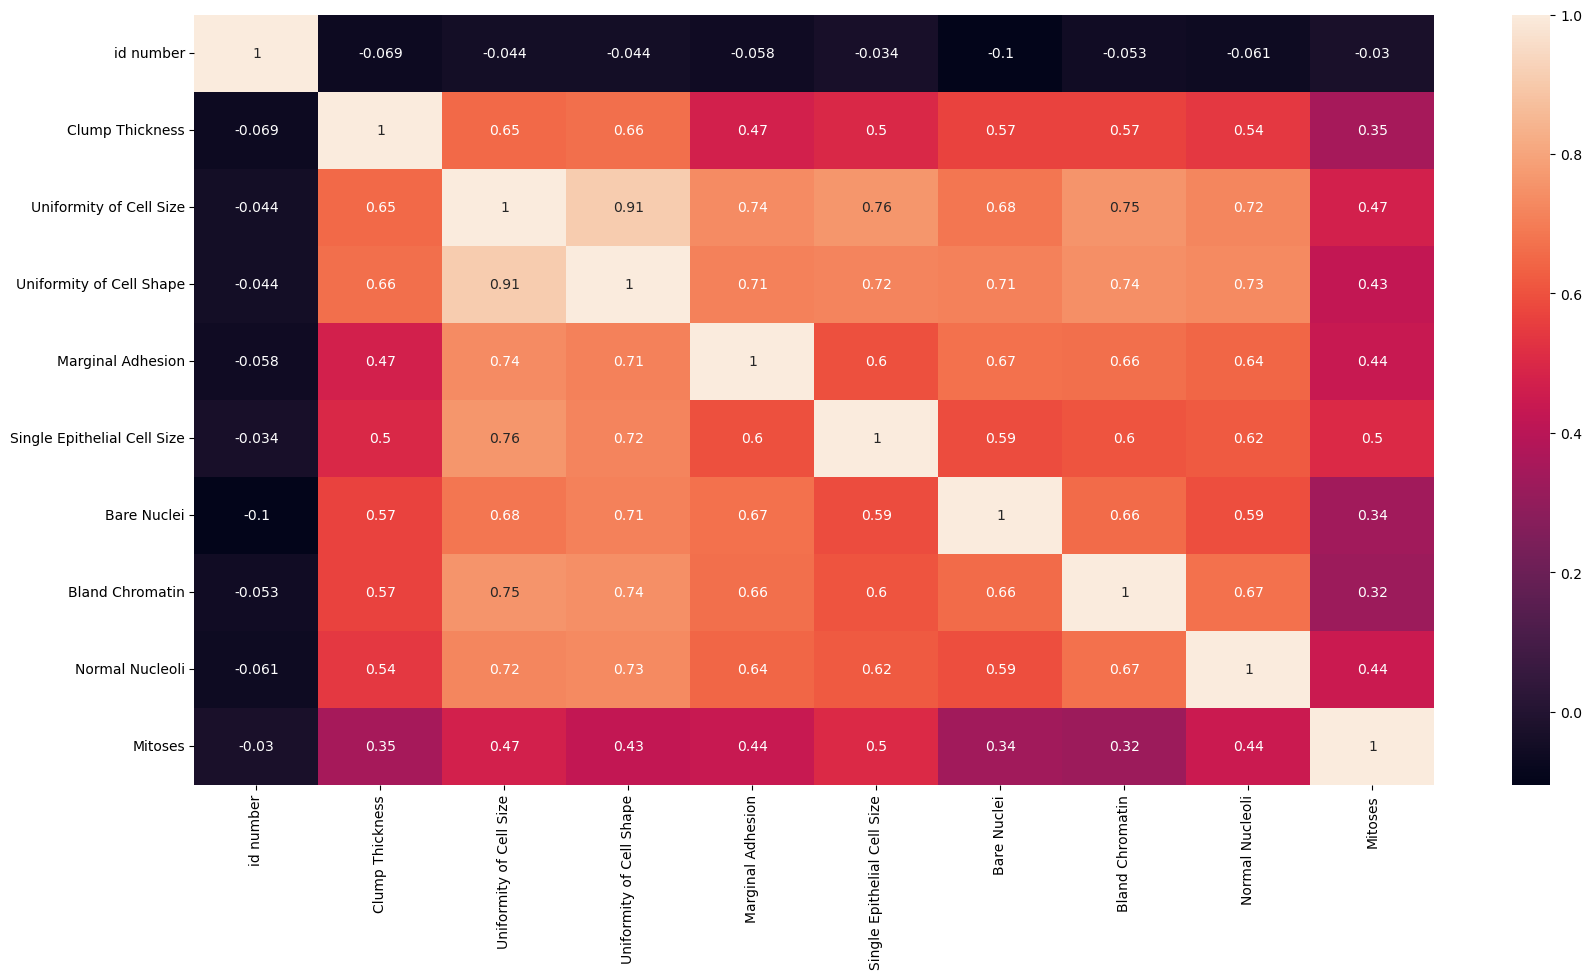

In [49]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [50]:
X_train=X_train.drop(columns=['Uniformity of Cell Size', 'Uniformity of Cell Shape'])
X_test=X_test.drop(columns=['Uniformity of Cell Size', 'Uniformity of Cell Shape'])

In [51]:
X_train.head(10)

,id number,Clump Thickness,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
405,0.256586,-1.214667,-0.633247,-0.549561,-0.696275,-0.590067,-0.611825,-0.343912
425,0.302998,1.628538,2.520955,3.065906,1.781250,2.693171,2.337594,-0.343912
244,0.346753,-1.214667,-0.633247,-0.549561,-0.696275,-0.179662,-0.611825,-0.343912
471,0.270935,0.562336,0.067687,-0.549561,-0.696275,-1.000471,-0.611825,-0.343912
224,0.252177,1.983939,1.119088,-0.097628,1.781250,1.461957,2.009880,0.239570
413,0.271158,0.206936,-0.633247,-0.549561,-0.696275,-0.179662,-0.611825,-0.343912
573,-1.211898,-1.214667,-0.633247,-0.549561,-0.696275,-0.590067,-0.611825,-0.343912
140,0.181320,-0.503866,-0.633247,-0.549561,-0.696275,-1.000471,-0.611825,-0.343912
447,-0.020847,0.206936,-0.633247,-0.549561,-0.696275,-1.000471,-0.611825,-0.343912
162,0.203625,-0.503866,-0.633247,-0.549561,-0.696275,-0.179662,-0.611825,-0.343912


# Create our Logistic Regression Model
add_constant()
By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. Hence, you need to use thecommand 'add_constant' so that it also fits an intercept.

In [52]:
from statsmodels.tools import add_constant as a_c
import statsmodels.api as sm

In [53]:
X_train_constant=a_c(X_train)
X_train_constant.head()

,const,id number,Clump Thickness,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
405,1.0,0.256586,-1.214667,-0.633247,-0.549561,-0.696275,-0.590067,-0.611825,-0.343912
425,1.0,0.302998,1.628538,2.520955,3.065906,1.781250,2.693171,2.337594,-0.343912
244,1.0,0.346753,-1.214667,-0.633247,-0.549561,-0.696275,-0.179662,-0.611825,-0.343912
471,1.0,0.270935,0.562336,0.067687,-0.549561,-0.696275,-1.000471,-0.611825,-0.343912
224,1.0,0.252177,1.983939,1.119088,-0.097628,1.781250,1.461957,2.009880,0.239570


In [54]:
cols=X_train_constant.columns
model=sm.Logit(y_train, X_train_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.067602
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  489
Model:                          Logit   Df Residuals:                      480
Method:                           MLE   Df Model:                            8
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.8931
Time:                        22:29:05   Log-Likelihood:                -33.057
converged:                       True   LL-Null:                       -309.13
Covariance Type:            nonrobust   LLR p-value:                4.476e-114
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0467      0.388     -2.695      0.007      -1.808      -0.286
id number                       0.1313      0.523      0.251      0.802      -0.894       1.157
Clump Thickness                 2.1334      0.514      4.151      0.000       1.126       3.141
Marginal Adhesion               1.2997      0.498      2.610      0.009       0.324       2.276
Single Epithelial Cell Size     0.4391      0.386      1.137      0.255      -0.318       1.196
Bare Nuclei                     1.9544      0.460      4.251      0.000       1.053       2.856
Bland Chromatin                 1.2711      0.458      2.778      0.005       0.374       2.168
Normal Nucleoli                 0.8119      0.394      2.059      0.039       0.039       1.585
Mitoses                         1.5142      0.683      2.217      0.027       0.175       2.853
===============================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [55]:
drop_cols=['id number','Single Epithelial Cell Size']

In [56]:
X_train_constant.drop(drop_cols,axis=1,inplace=True)

In [57]:
model = sm.Logit(y_train, X_train_constant)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.068972
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  489
Model:                          Logit   Df Residuals:                      482
Method:                           MLE   Df Model:                            6
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.8909
Time:                        22:29:05   Log-Likelihood:                -33.727
converged:                       True   LL-Null:                       -309.13
Covariance Type:            nonrobust   LLR p-value:                9.424e-116
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9897      0.371     -2.665      0.008      -1.718      -0.262
Clump Thickness       2.1151      0.497      4.256      0.000       1.141       3.089
Marginal Adhesion     1.4169      0.505      2.805      0.005       0.427       2.407
Bare Nuclei           1.9732      0.434      4.551      0.000       1.123       2.823
Bland Chromatin       1.3214      0.448      2.947      0.003       0.442       2.200
Normal Nucleoli       0.9736      0.380      2.560      0.010       0.228       1.719
Mitoses               1.5013      0.650      2.309      0.021       0.227       2.776
=====================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [58]:
X_train_constant.columns

Index(['const', 'Clump Thickness', 'Marginal Adhesion', 'Bare Nuclei',
       'Bland Chromatin', 'Normal Nucleoli', 'Mitoses'],
      dtype='object')

In [59]:
cols_model=['Clump Thickness', 'Marginal Adhesion', 'Bare Nuclei','Bland Chromatin', 'Normal Nucleoli', 'Mitoses']

In [60]:
X_train1=X_train_constant[cols_model]

In [61]:
logreg=LogisticRegression()
logreg.fit(X_train1,y_train)

LogisticRegression()

In [62]:
y_train_pred=logreg.predict(X_train1)

In [63]:
sklearn.metrics.accuracy_score(y_train, y_train_pred)

0.9734151329243353

In [64]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

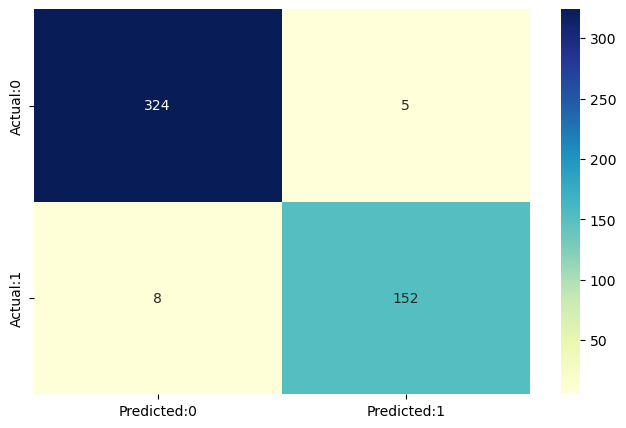

In [65]:
cm=confusion_matrix(y_train,y_train_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [66]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [67]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Missclassifications = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity/Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Precision/Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9734151329243353 
 Missclassifications = 1-Accuracy =  0.026584867075664653 
 Sensitivity/Recall or True Positive Rate = TP/(TP+FN) =  0.95 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9848024316109423 
 Precision/Positive Predictive value = TP/(TP+FP) =  0.9681528662420382 
 Negative predictive Value = TN/(TN+FN) =  0.9759036144578314 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  62.510000000000105 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.050771604938271646


[[9.98497803e-01 1.50219655e-03]
 [4.02990180e-06 9.99995970e-01]
 [9.97578646e-01 2.42135391e-03]
 [9.61146019e-01 3.88539809e-02]
 [3.31035063e-05 9.99966896e-01]
 [9.73899982e-01 2.61000179e-02]
 [9.98497803e-01 1.50219655e-03]
 [9.96911040e-01 3.08895962e-03]
 [9.89809045e-01 1.01909554e-02]
 [9.91999260e-01 8.00073961e-03]
 [9.99068370e-01 9.31629806e-04]
 [9.99068370e-01 9.31629806e-04]
 [9.73906191e-01 2.60938090e-02]
 [9.73899982e-01 2.61000179e-02]
 [2.74647823e-02 9.72535218e-01]
 [9.90969714e-01 9.03028627e-03]
 [9.98303068e-01 1.69693185e-03]
 [9.98497803e-01 1.50219655e-03]
 [3.95712597e-02 9.60428740e-01]
 [9.78304661e-01 2.16953391e-02]
 [9.97265083e-01 2.73491662e-03]
 [7.41411130e-02 9.25858887e-01]
 [9.70610396e-01 2.93896040e-02]
 [8.00020238e-03 9.91999798e-01]
 [9.97953902e-01 2.04609809e-03]
 [9.99068370e-01 9.31629806e-04]
 [9.89809045e-01 1.01909554e-02]
 [1.59862499e-03 9.98401375e-01]
 [7.34593114e-06 9.99992654e-01]
 [9.98303068e-01 1.69693185e-03]
 [9.969110

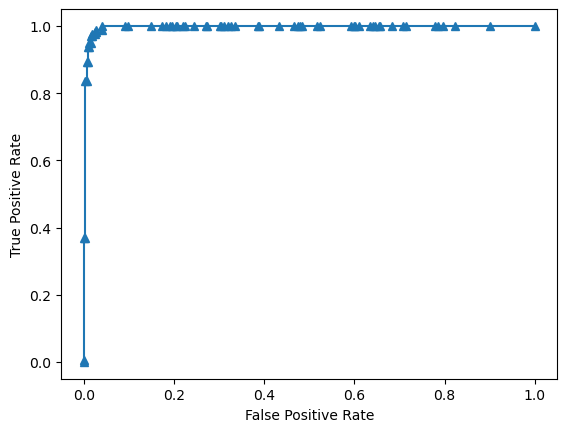

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probs = logreg.predict_proba(X_train1)
print(lr_probs)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_train, lr_probs)
print('Logistic: ROC AUC = %.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='^')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [69]:
 pd.DataFrame(zip(lr_fpr, lr_tpr), columns=('FPR', 'TPR'))

,FPR,TPR
0,0.000000,0.00000
1,0.000000,0.00625
2,0.000000,0.36875
3,0.003040,0.36875
4,0.003040,0.83750
5,0.006079,0.83750
6,0.006079,0.89375
7,0.009119,0.89375
8,0.009119,0.93750
9,0.012158,0.93750


In [70]:
y_train.shape

(489,)

In [71]:
y_train_pred_final = pd.DataFrame({'CLASS':y_train.values, 'CLASS_Prob':lr_probs})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head(100)

,CLASS,CLASS_Prob,ID
0,0,0.001502,405
1,1,0.999996,425
2,0,0.002421,244
3,0,0.038854,471
4,1,0.999967,224
5,0,0.026100,413
6,0,0.001502,573
7,0,0.003089,140
8,0,0.010191,447
9,0,0.008001,162


In [74]:
y_train_pred_final['predicted'] = y_train_pred_final.CLASS_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(100)

,CLASS,CLASS_Prob,ID,predicted
0,0,0.001502,405,0
1,1,0.999996,425,1
2,0,0.002421,244,0
3,0,0.038854,471,0
4,1,0.999967,224,1
5,0,0.026100,413,0
6,0,0.001502,573,0
7,0,0.003089,140,0
8,0,0.010191,447,0
9,0,0.008001,162,0


In [75]:
from sklearn import metrics
# Create Confusion matrix 
confusion=metrics.confusion_matrix(y_train_pred_final.CLASS,y_train_pred_final.predicted)

In [76]:
confusion

array([[324,   5],
       [  8, 152]], dtype=int64)

In [77]:
print(metrics.accuracy_score(y_train_pred_final.CLASS, y_train_pred_final.predicted))

0.9734151329243353


Is our probability threshold of 0.5 good? Finding Optimal Cutoff Point...

In [80]:
Numbers = [float(x)/10 for x in range(10)]
for i in Numbers:
    y_train_pred_final[i]= y_train_pred_final.CLASS_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(20)

,CLASS,CLASS_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001502,405,0,1,0,0,0,0,0,0,0,0,0
1,1,0.999996,425,1,1,1,1,1,1,1,1,1,1,1
2,0,0.002421,244,0,1,0,0,0,0,0,0,0,0,0
3,0,0.038854,471,0,1,0,0,0,0,0,0,0,0,0
4,1,0.999967,224,1,1,1,1,1,1,1,1,1,1,1
5,0,0.026100,413,0,1,0,0,0,0,0,0,0,0,0
6,0,0.001502,573,0,1,0,0,0,0,0,0,0,0,0
7,0,0.003089,140,0,1,0,0,0,0,0,0,0,0,0
8,0,0.010191,447,0,1,0,0,0,0,0,0,0,0,0
9,0,0.008001,162,0,1,0,0,0,0,0,0,0,0,0


In [82]:
Numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [83]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.CLASS, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy    sensi     speci
0.0   0.0  0.327198  1.00000  0.000000
0.1   0.1  0.961145  1.00000  0.942249
0.2   0.2  0.971370  0.98750  0.963526
0.3   0.3  0.977505  0.98125  0.975684
0.4   0.4  0.977505  0.96875  0.981763
0.5   0.5  0.973415  0.95000  0.984802
0.6   0.6  0.975460  0.95000  0.987842
0.7   0.7  0.969325  0.92500  0.990881
0.8   0.8  0.961145  0.89375  0.993921
0.9   0.9  0.944785  0.84375  0.993921


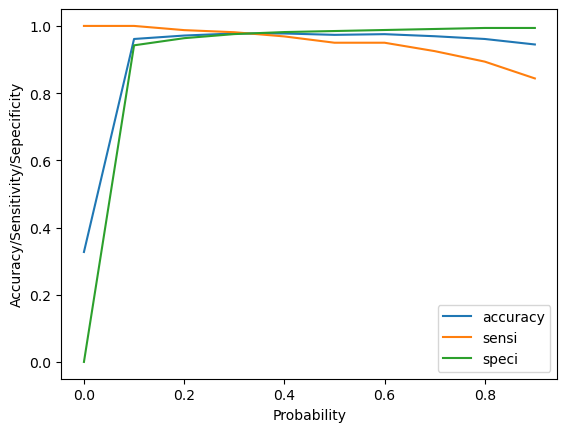

In [84]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xlabel('Probability')
plt.ylabel('Accuracy/Sensitivity/Sepecificity')
plt.show()

# From the plot above, probability threshold of about 0.3 appears to be optimum

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final.CLASS_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head(30)

,CLASS,CLASS_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.001502,405,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.999996,425,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.002421,244,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.038854,471,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.999967,224,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0.026100,413,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0.001502,573,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0.003089,140,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0.010191,447,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0.008001,162,0,1,0,0,0,0,0,0,0,0,0,0


In [86]:
metrics.accuracy_score(y_train_pred_final.CLASS, y_train_pred_final.final_predicted)

0.9775051124744376

In [95]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.CLASS, y_train_pred_final.final_predicted )
confusion2

array([[321,   8],
       [  3, 157]], dtype=int64)

In [96]:
X_test=X_test[cols_model]
X_test

,Clump Thickness,Marginal Adhesion,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
384,-0.859266,-0.633247,-0.696275,-1.000471,-0.611825,-0.343912
319,-0.148465,0.418154,0.404847,1.461957,0.043601,-0.343912
227,1.273138,0.768621,0.404847,1.461957,1.354454,-0.343912
421,1.983939,1.469555,1.781250,1.872361,-0.284112,-0.343912
395,-0.503866,-0.633247,-0.696275,-0.590067,-0.611825,-0.343912
468,-0.148465,-0.633247,-0.696275,-1.000471,-0.611825,-0.343912
48,-0.148465,0.067687,-0.696275,-0.179662,-0.611825,-0.343912
462,0.562336,0.067687,-0.696275,-1.000471,-0.611825,-0.343912
592,1.983939,0.768621,1.781250,0.230743,-0.611825,-0.343912
248,-0.148465,-0.633247,-0.696275,-0.179662,1.026741,-0.343912


In [97]:
X_test.ndim

2

In [98]:
y_test_pred=logreg.predict(X_test)

In [99]:
y_test_pred.ndim

1

In [100]:
y_test_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [101]:
y_P1=pd.DataFrame(y_test_pred)

In [102]:
y_test_df=pd.DataFrame(y_test)
y_test_df.head()

,Class
384,0
319,0
227,1
421,1
395,0


In [103]:
y_test_df['ID']=y_test_df.index

In [106]:
y_test_df.head(10)

,Class,ID
384,0,384
319,0,319
227,1,227
421,1,421
395,0,395
468,0,468
48,0,48
462,0,462
592,1,592
248,0,248


In [107]:
y_P1.reset_index(drop=True,inplace=True)

In [108]:
y_test_df.reset_index(drop=True,inplace=True)

In [109]:
y_test_df.head(10)

,Class,ID
0,0,384
1,0,319
2,1,227
3,1,421
4,0,395
5,0,468
6,0,48
7,0,462
8,1,592
9,0,248


In [116]:
y_Pred_final=pd.concat([y_test_df,y_P1],axis=1)

In [117]:
lr_probs_test = logreg.predict_proba(X_test)

In [118]:
lr_probs_test.shape

(210, 2)

In [119]:
lr_probs_test

array([[9.98303068e-01, 1.69693185e-03],
       [2.20174668e-01, 7.79825332e-01],
       [5.02581838e-03, 9.94974182e-01],
       [2.16393993e-04, 9.99783606e-01],
       [9.95025818e-01, 4.97418182e-03],
       [9.94383528e-01, 5.61647172e-03],
       [9.69305393e-01, 3.06946074e-02],
       [9.61146019e-01, 3.88539809e-02],
       [4.28612501e-03, 9.95713875e-01],
       [9.35355589e-01, 6.46444109e-02],
       [1.81000702e-03, 9.98189993e-01],
       [9.99068370e-01, 9.31629806e-04],
       [9.90969714e-01, 9.03028627e-03],
       [9.97213619e-01, 2.78638097e-03],
       [4.13485693e-04, 9.99586514e-01],
       [9.89809045e-01, 1.01909554e-02],
       [9.95594982e-01, 4.40501769e-03],
       [1.07753814e-03, 9.98922462e-01],
       [9.91778731e-01, 8.22126909e-03],
       [1.28441858e-02, 9.87155814e-01],
       [3.68360961e-05, 9.99963164e-01],
       [9.97578646e-01, 2.42135391e-03],
       [9.98497803e-01, 1.50219655e-03],
       [9.97265083e-01, 2.73491662e-03],
       [6.089534

In [120]:
lr_probs_test[:,1].shape

(210,)

In [121]:
lr_probs_test = lr_probs_test[:, 1]

In [122]:
y_Pred_final['CLASS_Prob'] = lr_probs_test

In [124]:
y_Pred_final.head(10)

,Class,ID,0,CLASS_Prob
0,0,384,0,0.001697
1,0,319,1,0.779825
2,1,227,1,0.994974
3,1,421,1,0.999784
4,0,395,0,0.004974
5,0,468,0,0.005616
6,0,48,0,0.030695
7,0,462,0,0.038854
8,1,592,1,0.995714
9,0,248,0,0.064644


In [126]:
y_Pred_final['final_predicted'] = y_Pred_final.CLASS_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [127]:
y_Pred_final.head(10)

,Class,ID,0,CLASS_Prob,final_predicted
0,0,384,0,0.001697,0
1,0,319,1,0.779825,1
2,1,227,1,0.994974,1
3,1,421,1,0.999784,1
4,0,395,0,0.004974,0
5,0,468,0,0.005616,0
6,0,48,0,0.030695,0
7,0,462,0,0.038854,0
8,1,592,1,0.995714,1
9,0,248,0,0.064644,0


In [133]:
metrics.accuracy_score(y_Pred_final.Class, y_Pred_final.final_predicted)

0.9571428571428572

In [136]:
confusion2 = metrics.confusion_matrix(y_Pred_final.Class, y_Pred_final.final_predicted )
confusion2

array([[122,   7],
       [  2,  79]], dtype=int64)

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics

In [138]:
from sklearn.model_selection import GridSearchCV
parameters={'C':[1,10,100],'gamma':[1e-2,1e-3,1e-4]}
svc_gs=svm.SVC(kernel='rbf')
clf=GridSearchCV(svc_gs,param_grid=parameters,scoring='accuracy',return_train_score=True)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             return_train_score=True, scoring='accuracy')

In [139]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003411,0.002334,0.002187,0.000403,1,0.01,"{'C': 1, 'gamma': 0.01}",0.969388,0.979592,0.969388,0.959184,0.979381,0.971386,0.007591,4,0.974425,0.971867,0.969309,0.974425,0.974490,0.972903,0.002056
1,0.004990,0.001095,0.002793,0.000746,1,0.001,"{'C': 1, 'gamma': 0.001}",0.948980,0.948980,0.959184,0.948980,0.958763,0.952977,0.004898,7,0.951407,0.956522,0.951407,0.956522,0.948980,0.952967,0.003035
2,0.005581,0.000485,0.003393,0.000797,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.673469,0.673469,0.673469,0.673469,0.670103,0.672796,0.001347,9,0.672634,0.672634,0.672634,0.672634,0.673469,0.672801,0.000334
3,0.002209,0.000390,0.000997,0.000631,10,0.01,"{'C': 10, 'gamma': 0.01}",0.979592,0.948980,0.979592,0.959184,0.979381,0.969346,0.012874,5,0.976982,0.982097,0.979540,0.979540,0.977041,0.979040,0.001901
4,0.002195,0.000416,0.001802,0.000402,10,0.001,"{'C': 10, 'gamma': 0.001}",0.969388,0.979592,0.979592,0.959184,0.979381,0.973427,0.008132,1,0.971867,0.971867,0.969309,0.976982,0.971939,0.972393,0.002503
5,0.004313,0.000404,0.002593,0.000490,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.948980,0.948980,0.959184,0.948980,0.958763,0.952977,0.004898,7,0.951407,0.953964,0.948849,0.956522,0.948980,0.951944,0.002956
6,0.002394,0.000489,0.001396,0.000489,100,0.01,"{'C': 100, 'gamma': 0.01}",0.989796,0.969388,0.959184,0.959184,0.969072,0.969325,0.011179,6,0.979540,0.989770,0.984655,0.982097,0.984694,0.984151,0.003394
7,0.001996,0.000002,0.001195,0.000398,100,0.001,"{'C': 100, 'gamma': 0.001}",0.979592,0.959184,0.989796,0.959184,0.979381,0.973427,0.012224,1,0.976982,0.982097,0.976982,0.979540,0.974490,0.978018,0.002590
8,0.002194,0.000398,0.001587,0.000480,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.969388,0.979592,0.979592,0.959184,0.979381,0.973427,0.008132,1,0.971867,0.974425,0.969309,0.976982,0.971939,0.972904,0.002603


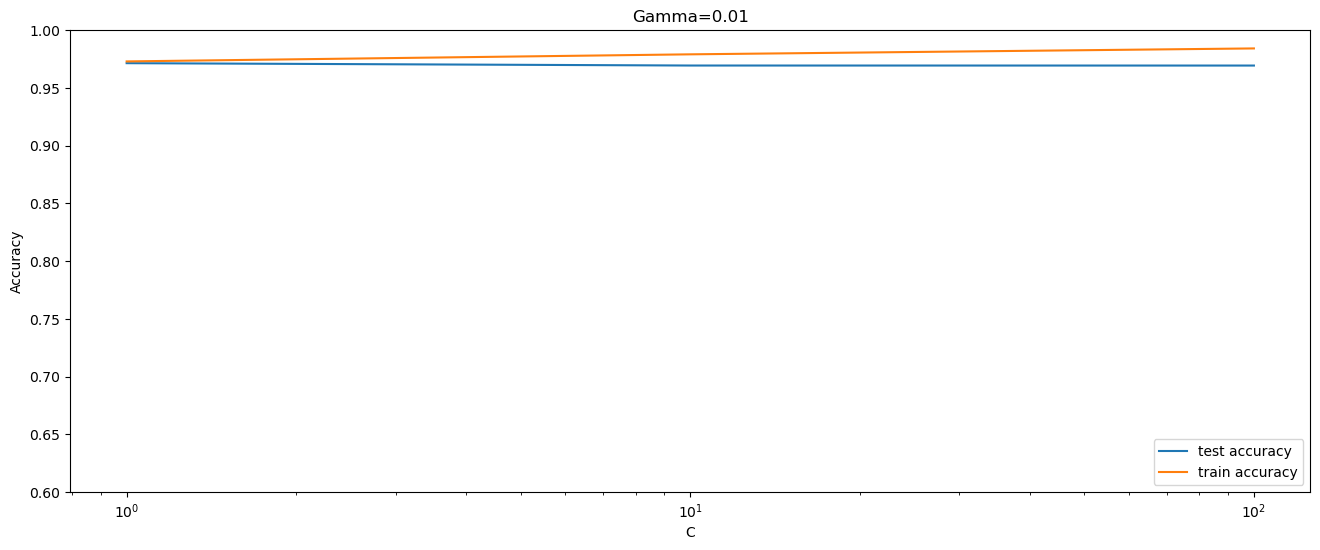

In [140]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,6))

gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

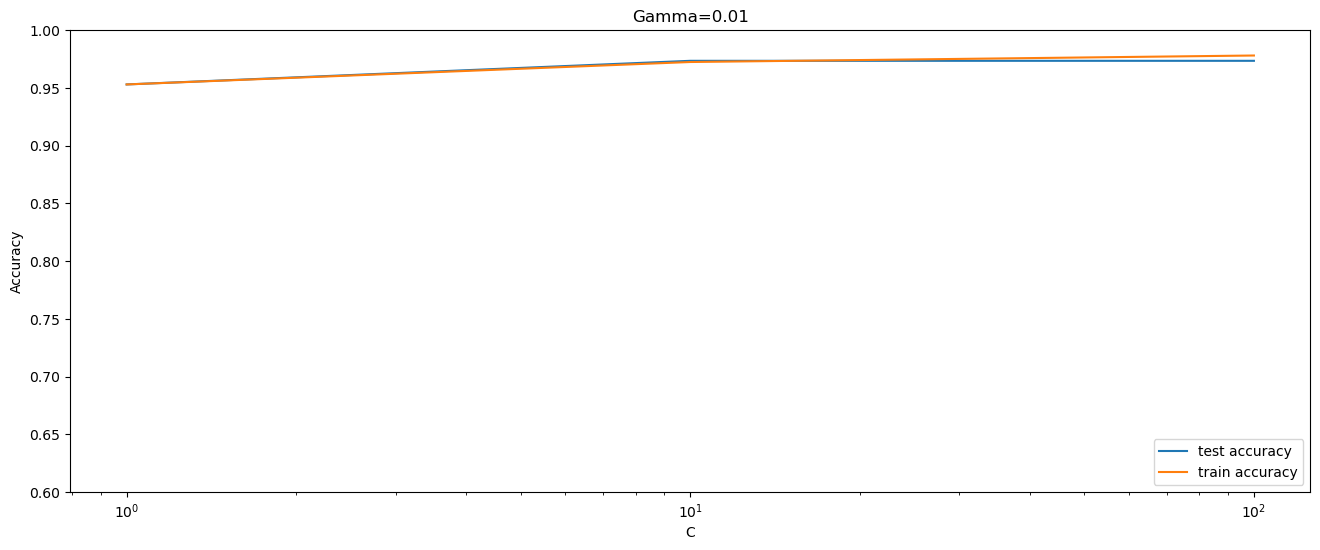

In [141]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,6))

gamma_01 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

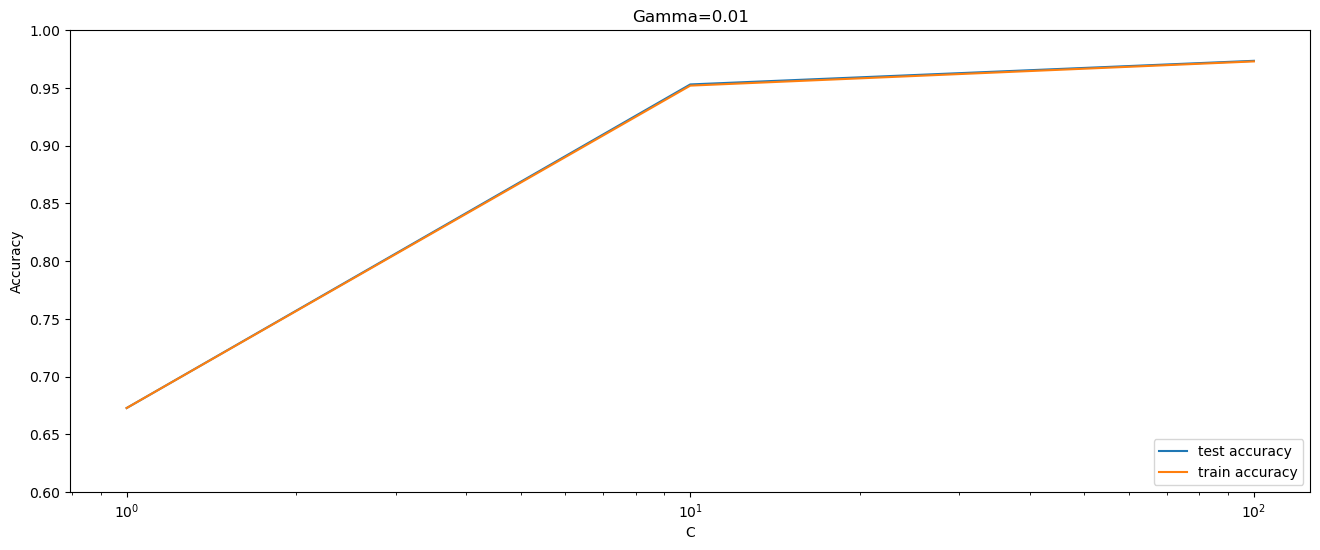

In [142]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,6))

gamma_01 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

In [143]:
clf.best_score_

0.973427309067957

In [144]:
clf.best_params_

{'C': 10, 'gamma': 0.001}